In [44]:
import altair as alt
import pandas as pd

In [45]:
alt.renderers.enable('png')

RendererRegistry.enable('png')

In [46]:
# import briefings with calculated emotion and topic values
briefings_df = pd.read_csv('../data/topic_scored_briefings.csv')
briefings_df

,date,timestamp,speaker,text,tb_polarity,tb_subjectivity,v_compound_polarity,anger,anticipation,disgust,fear,joy,nrc_negative,nrc_positive,sadness,surprise,trust,pp_text,topic_pred,topic_score
0,2020-02-26,05:39,Donald Trump,Thank you very much everybody. Thank you very ...,0.078559,0.562093,0.7316,0.136364,0.136364,0.090909,0.181818,0.090909,0.272727,0.181818,0.136364,0.090909,0.090909,"['thank', 'thank', 'begin', 'like', 'extend', ...",International,0.544385
1,2020-02-26,06:59,Donald Trump,A lot of people thought we shouldn’t have done...,0.284714,0.431381,0.9510,0.055556,0.222222,0.111111,0.166667,0.055556,0.166667,0.222222,0.055556,0.055556,0.166667,"['lot', 'people', 'think', 'turn', 'good', 'th...",Policy & Guidelines,0.573967
2,2020-02-26,07:51,Donald Trump,We have a total of 15. We took in some from Ja...,0.221088,0.506516,0.9888,0.000000,0.130435,0.000000,0.043478,0.173913,0.000000,0.391304,0.043478,0.086957,0.217391,"['total', '15', 'take', 'japan', 'hear', 'amer...",International,0.337955
3,2020-02-26,09:58,Donald Trump,China you know about. Where it started. I spok...,-0.038796,0.439352,0.9124,0.142857,0.214286,0.000000,0.142857,0.214286,0.214286,0.357143,0.000000,0.071429,0.214286,"['china', 'know', 'start', 'speak', 'president...",International,0.599763
4,2020-02-26,10:52,Donald Trump,"We’re bringing in a specialist, a very highly ...",0.036440,0.635832,-0.8626,0.000000,0.153846,0.000000,0.076923,0.076923,0.230769,0.153846,0.076923,0.000000,0.153846,"['bring', 'specialist', 'regarded', 'specialis...",Testing,0.322573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9674,2020-04-27,01:01:23,Unnamed (Reporter),[crosstalk 00:13:23].,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,['crosstalk'],NaN,NaN
9675,2020-04-27,01:01:24,Donald Trump,"Let’s do one more. Please, in the back.",0.250000,0.250000,0.3804,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,['let'],NaN,NaN
9676,2020-04-27,01:01:26,Unnamed,If an American president loses more Americans ...,0.066667,0.200000,-0.8689,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.666667,"['american', 'president', 'lose', 'americans',...",Policy & Guidelines,0.586939
9677,2020-04-27,01:01:36,Donald Trump,"So yeah, we’ve lost a lot of people, but if yo...",0.241667,0.527083,0.9225,0.071429,0.142857,0.000000,0.071429,0.071429,0.142857,0.214286,0.071429,0.071429,0.071429,"['yeah', 'lose', 'lot', 'people', 'look', 'ori...",International,0.455969


In [47]:
briefings_df.describe()

,tb_polarity,tb_subjectivity,v_compound_polarity,anger,anticipation,disgust,fear,joy,nrc_negative,nrc_positive,sadness,surprise,trust,topic_score
count,9679.000000,9679.000000,9679.00000,9679.000000,9679.000000,9679.000000,9679.000000,9679.000000,9679.000000,9679.000000,9679.000000,9679.000000,9679.000000,7197.000000
mean,0.128502,0.368890,0.34568,0.029856,0.092328,0.016062,0.054591,0.052345,0.079388,0.201060,0.037078,0.036290,0.114163,0.607561
std,0.193913,0.254386,0.49671,0.089222,0.154142,0.065942,0.120170,0.117600,0.143250,0.227794,0.097351,0.099463,0.168957,0.168801
min,-1.000000,0.000000,-0.99270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667
25%,0.000000,0.106696,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.477991
50%,0.100000,0.418556,0.37520,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.047619,0.586208
75%,0.244477,0.536981,0.81260,0.000000,0.142857,0.000000,0.076923,0.071429,0.125000,0.333333,0.000000,0.000000,0.181818,0.731230
max,1.000000,1.000000,0.99740,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.986487


In [48]:
emotions_df = briefings_df.drop(columns=['tb_polarity', 'tb_subjectivity', 'v_compound_polarity', 'pp_text', 'nrc_negative', 'nrc_positive', 'topic_score'])
emotions_df

,date,timestamp,speaker,text,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,topic_pred
0,2020-02-26,05:39,Donald Trump,Thank you very much everybody. Thank you very ...,0.136364,0.136364,0.090909,0.181818,0.090909,0.136364,0.090909,0.090909,International
1,2020-02-26,06:59,Donald Trump,A lot of people thought we shouldn’t have done...,0.055556,0.222222,0.111111,0.166667,0.055556,0.055556,0.055556,0.166667,Policy & Guidelines
2,2020-02-26,07:51,Donald Trump,We have a total of 15. We took in some from Ja...,0.000000,0.130435,0.000000,0.043478,0.173913,0.043478,0.086957,0.217391,International
3,2020-02-26,09:58,Donald Trump,China you know about. Where it started. I spok...,0.142857,0.214286,0.000000,0.142857,0.214286,0.000000,0.071429,0.214286,International
4,2020-02-26,10:52,Donald Trump,"We’re bringing in a specialist, a very highly ...",0.000000,0.153846,0.000000,0.076923,0.076923,0.076923,0.000000,0.153846,Testing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9674,2020-04-27,01:01:23,Unnamed (Reporter),[crosstalk 00:13:23].,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
9675,2020-04-27,01:01:24,Donald Trump,"Let’s do one more. Please, in the back.",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
9676,2020-04-27,01:01:26,Unnamed,If an American president loses more Americans ...,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,Policy & Guidelines
9677,2020-04-27,01:01:36,Donald Trump,"So yeah, we’ve lost a lot of people, but if yo...",0.071429,0.142857,0.000000,0.071429,0.071429,0.071429,0.071429,0.071429,International


### Draft emotion-based plots:

In [49]:
# subset df to specified speakers
speakers_of_interest = ['Donald Trump', 'Dr. Deborah Birx', 'Dr. Anthony Fauci']
top_speaker_df = emotions_df[emotions_df['speaker'].isin(speakers_of_interest)]

In [50]:
speaker_scores = top_speaker_df.groupby('speaker').mean()
speaker_scores.sort_values('surprise', ascending=False)

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
speaker,,,,,,,,
Donald Trump,0.036929,0.103733,0.022411,0.053375,0.070202,0.044869,0.047999,0.113506
Dr. Anthony Fauci,0.026834,0.103584,0.022233,0.053265,0.043755,0.038943,0.033822,0.101141
Dr. Deborah Birx,0.025091,0.087887,0.017097,0.070623,0.038831,0.048879,0.027514,0.118983


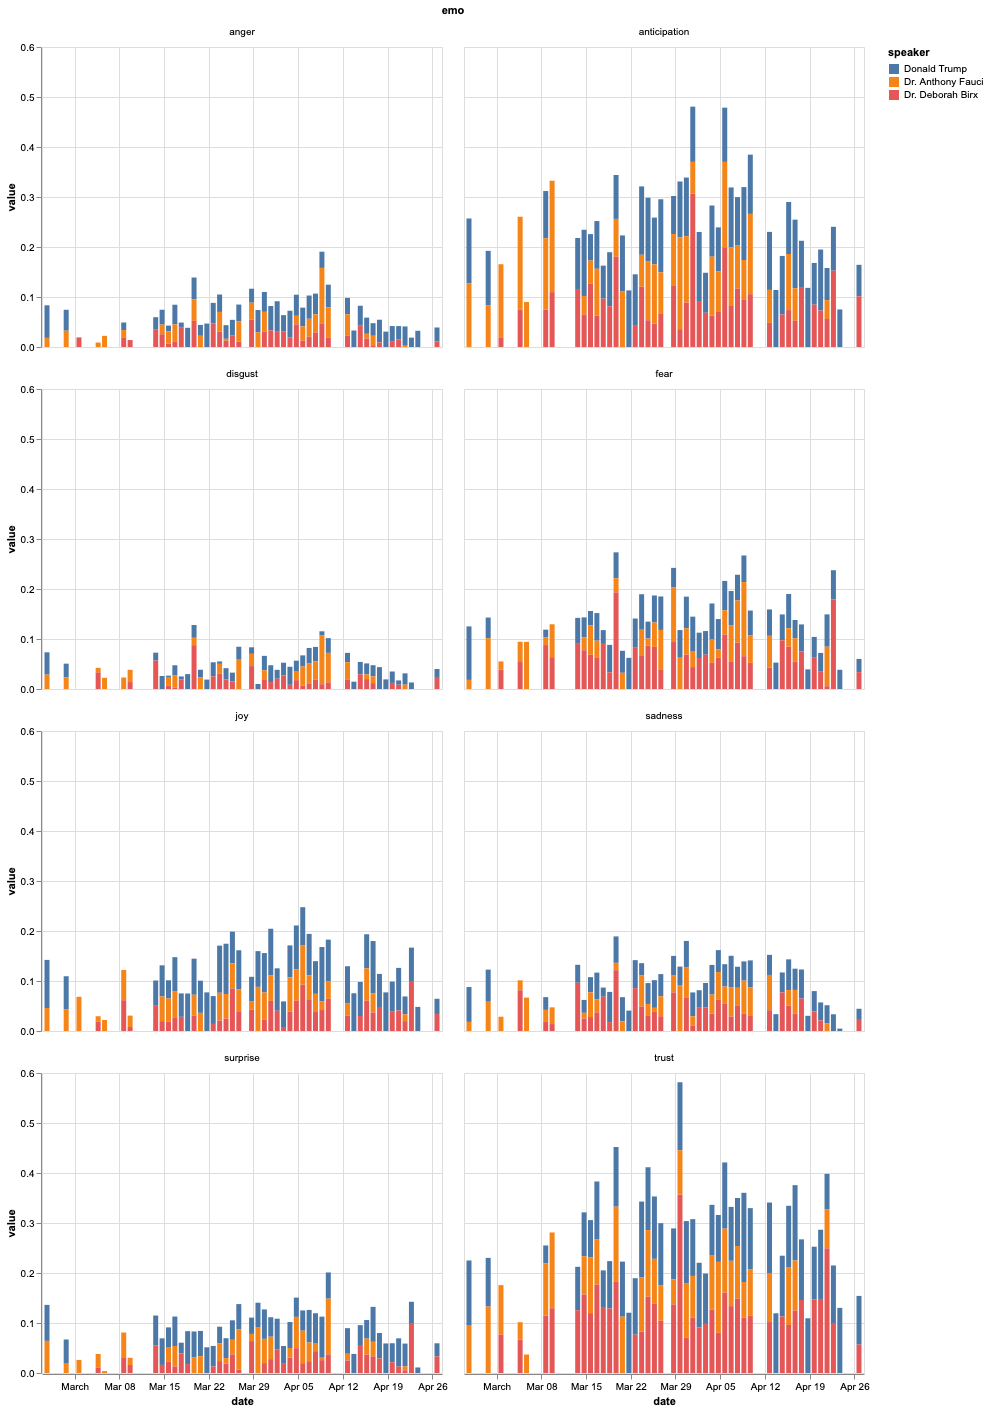

In [51]:
top_speakers_by_date = top_speaker_df.groupby(['date', 'speaker']).mean().reset_index()
top_speakers_by_date = top_speakers_by_date.melt(['date','speaker'], var_name='emo', value_name='value')

alt.Chart(top_speakers_by_date).mark_bar().encode(
    x='date:T',
    y='value:Q',
    color='speaker:N'
).properties(width = 400).facet(
    facet='emo:N',
    columns=2
)

In [52]:
trump_df = briefings_df[briefings_df['speaker']=='Donald Trump']

trump_daily_df = trump_df.groupby('date').mean()
trump_daily_df.reset_index(inplace = True)
trump_daily_df.head()

,date,tb_polarity,tb_subjectivity,v_compound_polarity,anger,anticipation,disgust,fear,joy,nrc_negative,nrc_positive,sadness,surprise,trust,topic_score
0,2020-02-26,0.181387,0.484285,0.443659,0.065220,0.130020,0.044657,0.107057,0.096120,0.116129,0.234239,0.069753,0.071990,0.130461,0.594834
1,2020-02-29,0.205216,0.438551,0.402572,0.041851,0.109343,0.027378,0.041405,0.065807,0.086543,0.223111,0.064299,0.048520,0.097374,0.609206
2,2020-03-09,0.127113,0.425177,0.775083,0.015152,0.094318,0.000000,0.015152,0.000000,0.085358,0.199942,0.025568,0.000000,0.035985,0.630342
3,2020-03-14,0.171852,0.438025,0.411749,0.023986,0.103714,0.015813,0.051895,0.050535,0.078123,0.185337,0.035996,0.059424,0.086877,0.603553
4,2020-03-15,0.268413,0.600066,0.794229,0.029762,0.132446,0.026020,0.039966,0.062176,0.067577,0.178591,0.025794,0.053175,0.087819,0.482494


In [53]:
# plot heatmap by date for a speaker

def plot_date_heatmap(speaker):
    speaker_feels = emotions_df[emotions_df['speaker']==speaker]
    speaker_feels_by_date = speaker_feels.groupby(['date']).mean().reset_index()
    speaker_feels_by_date = speaker_feels_by_date.melt('date', var_name='emo', value_name='value')

    plot = alt.Chart(speaker_feels_by_date).mark_rect().encode(
        x='date:O',
        y='emo:N',
        color='value:Q'
    ).properties(title = speaker)
    
    return plot

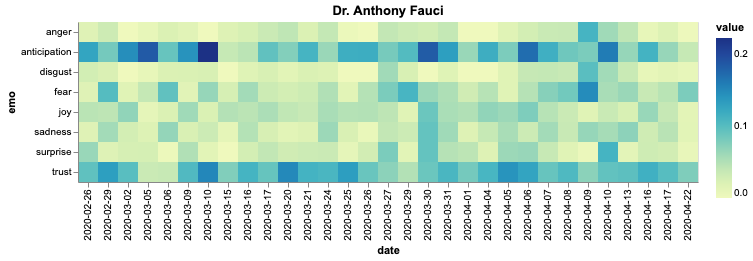

In [54]:
plot_date_heatmap('Dr. Anthony Fauci')

In [55]:
def plot_topic_heatmaps():
    speaker_feels = top_speaker_df
    speaker_feels_by_date = speaker_feels.groupby(['topic_pred', 'speaker']).mean().reset_index()
    speaker_feels_by_date = speaker_feels_by_date.melt(['topic_pred', 'speaker'], var_name='emo', value_name='value')

    plot = alt.Chart(speaker_feels_by_date).mark_rect().encode(
        x='topic_pred:O',
        y='emo:N',
        color='value:Q'
    ).facet(facet='speaker:N')
    
    return plot

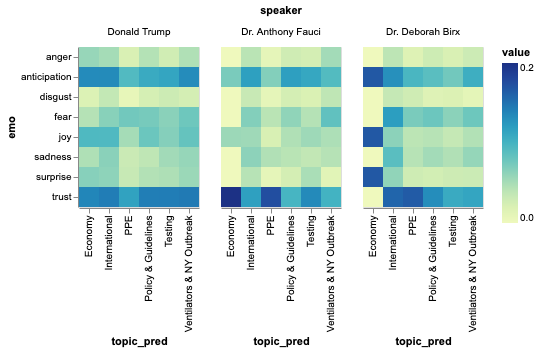

In [56]:
plot_topic_heatmaps()

### Scratchpad for other ideas:

In [57]:
# query for specific terms rather than topics
# chloroquine, ventilator, remdesivir etc

briefings_df[briefings_df['text'].str.contains("China")][100:110]

,date,timestamp,speaker,text,tb_polarity,tb_subjectivity,v_compound_polarity,anger,anticipation,disgust,fear,joy,nrc_negative,nrc_positive,sadness,surprise,trust,pp_text,topic_pred,topic_score
2128,2020-03-20,01:06:25,Unnamed,[crosstalk 01:06:25] I have two questions. The...,0.106250,0.352083,0.0000,0.000000,0.111111,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000,0.000000,0.000000,"['crosstalk', 'question', 'secretary', 'pompeo...",International,0.558708
2133,2020-03-20,01:07:18,Mike Pompeo,May I just say one more thing. There’s been so...,0.289219,0.467250,0.8465,0.000000,0.105263,0.000000,0.157895,0.052632,0.263158,0.263158,0.052632,0.000000,0.000000,"['thing', 'discussion', 'china', 'know', 'know...",Policy & Guidelines,0.358709
2134,2020-03-20,01:08:02,Mike Pompeo,"This is absolutely, this transparency, this re...",0.242857,0.444841,0.7471,0.058824,0.176471,0.058824,0.117647,0.000000,0.235294,0.294118,0.058824,0.000000,0.117647,"['transparency', 'realtime', 'information', 's...",Policy & Guidelines,0.468484
2147,2020-03-20,01:11:27,Dr. Anthony Fauci,"Thank you, Mr. President. First of all, I thin...",0.015138,0.512613,-0.5719,0.100000,0.200000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.200000,"['thank', 'mr', 'president', 'think', 'false',...",International,0.602451
2224,2020-03-20,01:32:32,Dr. Anthony Fauci,The possibility of aerosol transmission always...,0.045414,0.493183,-0.0900,0.000000,0.100000,0.000000,0.050000,0.000000,0.050000,0.050000,0.000000,0.000000,0.050000,"['possibility', 'aerosol', 'transmission', 'co...",International,0.487770
2375,2020-03-21,01:03:19,Donald Trump,"Well, I love whoever you’re with that’s becaus...",0.150124,0.468237,0.0983,0.000000,0.076923,0.000000,0.000000,0.076923,0.153846,0.230769,0.000000,0.076923,0.076923,"['love', 'think', 'nice', 'nice', 'question', ...",International,0.869140
2377,2020-03-21,01:05:01,Donald Trump,That’s the game. Win with as few lives lost as...,0.020146,0.592381,-0.9648,0.142857,0.071429,0.071429,0.071429,0.071429,0.357143,0.071429,0.214286,0.000000,0.142857,"['game', 'win', 'life', 'lose', 'possible', 't...",International,0.570702
2399,2020-03-21,01:09:52,Donald Trump,"When I learned I started doing the closing, so...",0.255729,0.552083,0.9136,0.000000,0.222222,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000,0.111111,"['learn', 'start', 'closing', 'time', 'learn',...",International,0.965033
2402,2020-03-21,01:10:37,Donald Trump,They didn’t have that time. They read about it...,0.257500,0.536250,0.7807,0.000000,0.200000,0.000000,0.000000,0.400000,0.000000,0.600000,0.000000,0.000000,0.600000,"['time', 'read', 'newspaper', 'like', 'china',...",International,0.869386
2407,2020-03-21,01:11:21,Unnamed,Because as you were saying China was extremely...,0.059167,0.650833,0.5267,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,"['say', 'china', 'secretive', 'advisor', 'crit...",International,0.487411


In [58]:
# look at trump's most angry passages
# need to revisit emotion calcs to see why we see so many ones here

trump_df.sort_values(by='anger', ascending=False)[:5]

,date,timestamp,speaker,text,tb_polarity,tb_subjectivity,v_compound_polarity,anger,anticipation,disgust,fear,joy,nrc_negative,nrc_positive,sadness,surprise,trust,pp_text,topic_pred,topic_score
7263,2020-04-13,35:50,Donald Trump,You’re so disgraceful. It’s so disgraceful the...,0.000000,0.000000,0.0000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,"['disgraceful', 'disgraceful', 'way', 'let', '...",International,0.791088
6551,2020-04-08,33:08,Donald Trump,I had a feeling it was done. Is that what he s...,0.000000,0.000000,0.3527,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"['feeling', 'say', 'know', 'know', '22', 'year']",International,0.545516
9065,2020-04-22,17:07,Donald Trump,You’ll want the leaders are the bad reporters.,-0.700000,0.666667,-0.4939,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,"['want', 'leader', 'bad', 'reporter']",NaN,NaN
1910,2020-03-19,01:12:19,Donald Trump,They treat me very nicely. Go ahead.,0.780000,1.000000,0.7089,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,['treat'],NaN,NaN
5590,2020-04-04,01:42:42,Donald Trump,"Both. Some states are doing when they land, th...",0.476667,0.976667,0.8595,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,"['state', 'land', 'strong', 'powerful', 'testi...",Ventilators & NY Outbreak,0.632770
